In [28]:
dirs = ["VGG-0.5-512", "ResNet-0.5-512", "ResNet-0.5-512"]
for one in dirs:
    allfiles = os.listdir(one)[:2]
    for file in allfiles:
        data = np.load(one + "/" + file, mmap_mode='r')
        print(one, data.shape)    



VGG-0.5-400 (50, 1408)
VGG-0.5-400 (50, 1408)
ResNet-0.5-400 (50, 2048)
ResNet-0.5-400 (50, 2048)
ResNet-0.5-512 (50, 2048)
ResNet-0.5-512 (50, 2048)
Inception-0.5-400 (50, 2048)
Inception-0.5-400 (50, 2048)


(50, 2048)


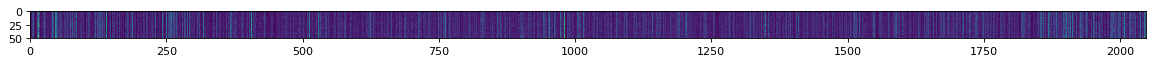

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline  
from openslide.deepzoom import DeepZoomGenerator

print(data.shape)

fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

plt.imshow(data)

circles, perplexity=5 in 0.39 sec
circles, perplexity=10 in 0.44 sec
circles, perplexity=15 in 0.47 sec
circles, perplexity=30 in 0.48 sec


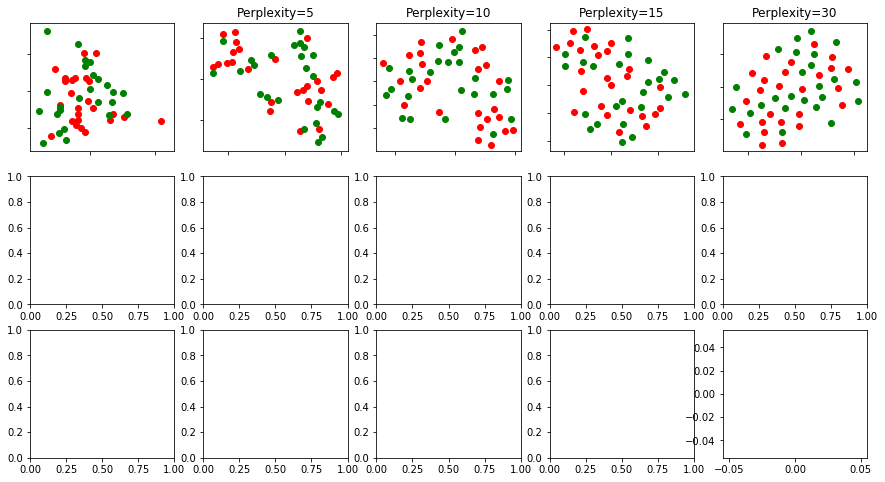

In [33]:
#T-SNE plot
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time

n_samples = 50
n_components = 2
(fig, subplots) = plt.subplots(3, 5, figsize=(15, 8))
perplexities = [5, 10, 15, 30]

X, y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
X = data
y = y[:50]

red = y == 0
green = y == 1

ax = subplots[0][0]
ax.scatter(X[red, 0], X[red, 1], c="r")
ax.scatter(X[green, 0], X[green, 1], c="g")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

for i, perplexity in enumerate(perplexities):
    ax = subplots[0][i + 1]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[red, 0], Y[red, 1], c="r")
    ax.scatter(Y[green, 0], Y[green, 1], c="g")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')


In [ ]:
df_tsne = df.loc[rndperm[:n_sne],:].copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

chart = ggplot(df_tsne, aes(x='x-tsne', y='y-tsne', color='label') ) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle("tSNE dimensions colored by digit")
chart

In [2]:
# count image shape
import os
import openslide
import pandas as pd
import numpy as np
from openslide.deepzoom import DeepZoomGenerator

svspath = '/home/llu1/HardDisk/TCGA_HC_image/' + 'SVS_Data/'
allfiles = os.listdir(svspath)
df = pd.DataFrame(index = range(len(allfiles)), columns = ['TCGA number', 'SVS code', 'Level', 'Level dim', 'Downsample dim', 'Tiles', 'Tile dim'])
for i in range(len(allfiles)):
    if i == 761:
        continue
    
    code = allfiles[i]
    #code = 'fa5919e4-2398-483a-ae51-f667646e1e3c'
    #print(os.listdir('SVS_Data/fa5919e4-2398-483a-ae51-f667646e1e3c'))
    one = os.listdir(svspath + code)
    one = [ n for n in one if 'svs' in n]     
    filename = svspath + code + '/' + one[0]
    test = openslide.open_slide(filename)
    
    downsamples=test.level_downsamples
    [w,h]=test.level_dimensions[0]

    print("Print the sample order " + str(i))
    print(downsamples)
    print(test.level_dimensions)
    
    if len(downsamples) < 3:
        continue
    
    
    size1=int(w*(downsamples[0]/downsamples[2]))
    size2=int(h*(downsamples[0]/downsamples[2]))
    region=np.array(test.read_region((0,0), 2, (size1,size2)))
    img = region
    print(size1, size2, img.shape)
    
    tiles = DeepZoomGenerator(test)
    #print(tiles.level_count, tiles.level_tiles, tiles.level_dimensions)
    dim = tiles.level_dimensions[-1]
    level = tiles.level_count
    tile = tiles.level_tiles[-1]
    tile_count = tiles.tile_count
    test.close()
    
    #print(str(dim), str((size1,size2)))
    df.iloc[i, :] = [one, code, level, str(dim), str((size1,size2)), tile_count, tile]

print(df.shape)


Print the sample order 0
(1.0, 4.000102556484702, 16.000692082314906, 32.00456642351871)
((113543, 80466), (28385, 20116), (7096, 5029), (3548, 2514))
7096 5028 (5028, 7096, 4)
Print the sample order 1
(1.0, 4.000096908615176, 16.00332047463829, 32.01284941648397)
((105576, 41278), (26394, 10319), (6598, 2579), (3299, 1289))
6597 2579 (2579, 6597, 4)
Print the sample order 2
(1.0, 4.000454594266237, 8.002121765783304)
((29879, 23647), (7469, 5911), (3734, 2955))
3733 2955 (2955, 3733, 4)
Print the sample order 3
(1.0, 4.000081698138208, 16.001278295626143, 32.005403597996825)
((100911, 89937), (25227, 22484), (6306, 5621), (3153, 2810))
6306 5620 (5620, 6306, 4)
Print the sample order 4
(1.0, 4.000141161461293, 16.000942374045017, 32.013916613061866)
((84727, 28433), (21181, 7108), (5295, 1777), (2647, 888))
5295 1776 (1776, 5295, 4)
Print the sample order 5
(1.0, 4.0001184272856465, 16.00116682991888, 32.01269025109448)
((92344, 33778), (23086, 8444), (5771, 2111), (2885, 1055))
5771 

6127 5351 (5351, 6127, 4)
Print the sample order 49
(1.0, 4.000295624753646, 16.005255602319487, 32.01418472073763)
((69720, 20299), (17430, 5074), (4357, 1268), (2178, 634))
4356 1268 (1268, 4356, 4)
Print the sample order 50
(1.0, 4.000071942446043, 16.003117405205366, 32.01545438491945)
((121512, 27801), (30378, 6950), (7594, 1737), (3797, 868))
7593 1737 (1737, 7593, 4)
Print the sample order 51
(1.0, 4.000158378207159, 16.003639266795346, 32.01104523354314)
((67988, 25258), (16997, 6314), (4249, 1578), (2124, 789))
4248 1578 (1578, 4248, 4)
Print the sample order 52
(1.0, 4.0000684587650035, 16.003707176933624, 32.01969615419117)
((87647, 27384), (21911, 6846), (5477, 1711), (2738, 855))
5476 1711 (1711, 5476, 4)
Print the sample order 53
(1.0, 4.000067097528034, 16.001634668803415, 64.02372333199543)
((138039, 84637), (34509, 21159), (8627, 5289), (2156, 1322))
8626 5289 (5289, 8626, 4)
Print the sample order 54
(1.0, 4.000235331032319, 16.003452605147523, 32.016959798994975)
((8

Print the sample order 98
(1.0, 4.0, 16.004405286343612)
((31872, 14536), (7968, 3634), (1992, 908))
1991 908 (908, 1991, 4)
Print the sample order 99
(1.0, 4.000038198069724, 16.00161359542097, 64.0164213481112)
((157079, 76380), (39269, 19095), (9817, 4773), (2454, 1193))
9816 4773 (4773, 9816, 4)
Print the sample order 100
(1.0, 4.000135482996884, 16.00162601626016, 32.0119305856833)
((106624, 29526), (26656, 7381), (6664, 1845), (3332, 922))
6663 1845 (1845, 6663, 4)
Print the sample order 101
(1.0, 4.000069194575145, 16.00249169435216, 64.04854573556274)
((165648, 28905), (41412, 7226), (10353, 1806), (2588, 451))
10351 1806 (1806, 10351, 4)
Print the sample order 102
(1.0, 4.000114085792516, 16.002346702338308, 32.00956282424032)
((33864, 52595), (8466, 13148), (2116, 3287), (1058, 1643))
2116 3286 (3286, 2116, 4)
Print the sample order 103
(1.0, 4.0, 16.00325146441459, 32.01680224973943)
((94248, 24888), (23562, 6222), (5890, 1555), (2945, 777))
5889 1555 (1555, 5889, 4)
Print t

6900 3627 (3627, 6900, 4)
Print the sample order 147
(1.0, 4.000168482533978, 16.004084817220175, 32.0153669103275)
((89640, 35615), (22410, 8903), (5602, 2225), (2801, 1112))
5601 2225 (2225, 5601, 4)
Print the sample order 148
(1.0, 4.000401600011994, 16.00548724250207, 32.02489583883636)
((79015, 18427), (19753, 4606), (4938, 1151), (2469, 575))
4936 1151 (1151, 4936, 4)
Print the sample order 149
(1.0, 4.000172912673264, 16.001630672926446)
((36001, 34086), (9000, 8521), (2250, 2130))
2249 2130 (2130, 2249, 4)
Print the sample order 150
(1.0, 4.000053919982745, 16.001078515962035, 32.00639432005966)
((60432, 74186), (15108, 18546), (3777, 4636), (1888, 2318))
3776 4636 (4636, 3776, 4)
Print the sample order 151
(1.0, 4.000142270168691, 16.001573296283283, 32.005825285311836)
((95615, 25153), (23903, 6288), (5975, 1572), (2987, 786))
5975 1571 (1571, 5975, 4)
Print the sample order 152
(1.0, 4.000063027858314, 16.002111237030817, 32.01031604688528)
((95199, 75256), (23799, 18814), (

Print the sample order 195
(1.0, 4.000037074569317, 16.000741546371366, 64.03271052022228)
((161839, 65648), (40459, 16412), (10114, 4103), (2528, 1025))
10114 4102 (4102, 10114, 4)
Print the sample order 196
(1.0, 4.000060603611976, 16.001212219169226, 32.005011315874555)
((99007, 25024), (24751, 6256), (6187, 1564), (3093, 782))
6187 1563 (1563, 6187, 4)
Print the sample order 197
(1.0, 4.000129685138204, 16.00121044874046, 32.00242089748092)
((113543, 78087), (28385, 19521), (7096, 4880), (3548, 2440))
7095 4880 (4880, 7095, 4)
Print the sample order 198
(1.0, 4.000249472658669, 16.004991055570557, 32.020638534786315)
((103583, 31327), (25895, 7831), (6473, 1957), (3236, 978))
6471 1957 (1957, 6471, 4)
Print the sample order 199
(1.0, 4.000110731962289, 16.001196052136116, 32.004400876901705)
((127487, 94243), (31871, 23560), (7967, 5890), (3983, 2945))
7967 5889 (5889, 7967, 4)
Print the sample order 200
(1.0, 4.000261576959998, 16.003808964858347, 32.02258915852666)
((71711, 22486

Print the sample order 244
(1.0, 4.000182179616981, 16.00199314252449, 32.00398628504898)
((82823, 36454), (20705, 9113), (5176, 2278), (2588, 1139))
5175 2278 (2278, 5175, 4)
Print the sample order 245
(1.0, 4.00017987208785, 16.004181683404774, 32.01203683021865)
((69719, 21321), (17429, 5330), (4357, 1332), (2178, 666))
4356 1332 (1332, 4356, 4)
Print the sample order 246
(1.0, 4.000171939477304, 16.000687757909215, 64.02132603199843)
((131472, 34899), (32868, 8724), (8217, 2181), (2054, 545))
8216 2181 (2181, 8216, 4)
Print the sample order 247
(1.0, 4.0, 16.00206206275403, 32.009240032390224)
((81672, 50072), (20418, 12518), (5104, 3129), (2552, 1564))
5103 3129 (3129, 5103, 4)
Print the sample order 248
(1.0, 4.000183950811719, 16.00391336747013, 32.01536279343145)
((90439, 34014), (22609, 8503), (5652, 2125), (2826, 1062))
5651 2125 (2125, 5651, 4)
Print the sample order 249
(1.0, 4.000077801502709, 16.00162315370945, 32.0032463074189)
((105671, 95149), (26417, 23787), (6604, 59

5939 2159 (2159, 5939, 4)
Print the sample order 293
(1.0, 4.0, 16.00093196644921, 32.004500716023)
((97104, 34340), (24276, 8585), (6069, 2146), (3034, 1073))
6068 2146 (2146, 6068, 4)
Print the sample order 294
(1.0, 4.000067499156261, 16.001890359168243, 32.00810372771475)
((60928, 59262), (15232, 14815), (3808, 3703), (1904, 1851))
3807 3703 (3703, 3807, 4)
Print the sample order 295
(1.0, 4.000251467933611, 16.003307533186838)
((27818, 37154), (6954, 9288), (1738, 2322))
1738 2321 (2321, 1738, 4)
Print the sample order 296
(1.0, 4.000023991171249, 16.00047984644914, 32.00095969289828)
((87648, 83365), (21912, 20841), (5478, 5210), (2739, 2605))
5477 5210 (5210, 5477, 4)
Print the sample order 297
(1.0, 4.0, 16.00311688311688, 32.01712370864042)
((99600, 30812), (24900, 7703), (6225, 1925), (3112, 962))
6223 1925 (1925, 6223, 4)
Print the sample order 298
(1.0, 4.000154687926873, 16.00162296731601, 32.00984829963683)
((95615, 65267), (23903, 16316), (5975, 4079), (2987, 2039))
5975

KeyboardInterrupt: 

In [1]:
print(df.shape)
print(df.head())



os.chdir('/home/llu1/HardDisk/TCGA_HC_image/results/HCC_clinical')
df.to_csv('HCC_image_dimention.csv')


df = df.dropna()
 

NameError: name 'df' is not defined

In [83]:
print(df.shape)
column = df['Level dim'].tolist()
xy = column

#xy = [str(i) for i in xy]

xy = [re.sub('[(|)]', '', i) for i in xy]

#print(xy[isnull(xy)])
#[ int(i.split(', ')[0]) for i in xy]

#[i for i in xy]


(964, 7)


In [86]:
import re
import numpy as np
from scipy.stats import iqr
##process x and y pixel

def obtain_pp(column = df['Level dim'].tolist()):

    xy = column
    #print(xy[:5])
    
    xy = [str(i) for i in xy]
    #xy = [i.replace('()', '') for i in xy]
    xy = [re.sub('[(|)]', '', i) for i in xy]
    xx = [ int(i.split(', ')[0]) for i in xy]
    yy = [ int(i.split(', ')[1]) for i in xy]
    #xx = iqr(np.array(xx))
    print([np.max(xx), np.min(xx), np.median(xx), np.mean(xx)])
    print([np.max(yy), np.min(yy), np.median(yy), np.mean(yy)])
    
    return(xx, yy)

xx1, yy1 = obtain_pp(column = df['Level dim'].tolist())
xx2, yy2 = obtain_pp(column = df['Downsample dim'].tolist())


[209439, 15935, 89640.0, 88549.85995850622]
[98570, 8772, 35870.0, 45266.43257261411]
[13089, 1368, 5601.0, 5550.8765560165975]
[6159, 548, 2249.5, 2841.094398340249]


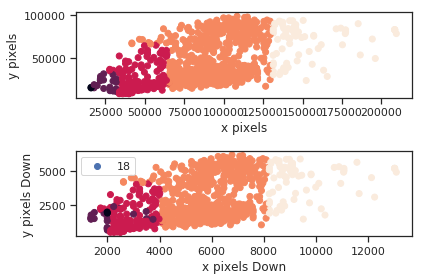

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")

%matplotlib inline 

ax = plt.subplot(211)

ax.scatter(xx1, yy1, c=df['Level'].tolist())
#ax.legend(df['Level'].tolist())
ax.set_ylabel("y pixels")
ax.set_xlabel("x pixels")

ax = plt.subplot(212)
ax.scatter(xx2, yy2, c=df['Level'].tolist())
ax.legend(df['Level'].tolist())
ax.set_ylabel("y pixels Down")
ax.set_xlabel("x pixels Down")

plt.tight_layout()
plt.show()
    
plt.savefig("image_downsample.pdf")   # save the figure to file
plt.close()    # close the figure